In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-catsvsdogs-dataset/readme[1].txt
/kaggle/input/microsoft-catsvsdogs-dataset/MSR-LA - 3467.docx
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7981.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6234.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1269.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3863.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6241.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10304.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/623.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2193.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11925.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3750.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11378.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2008.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10730.jpg
/kaggle/input/micros

In [3]:
""" 
these my libraries that i will use in training my dataset ... 

"""
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
"""
in this chapter : 
we will do pre-processing to my image to train on it .. 
1- resize image to (64 * 64) pixels to train . 
2- transfer my image from RGB to Gray ...  
"""

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.flatten()
    return image

In [6]:
"the path for dataset that we will training on it"
data_path = "/kaggle/input/dog-vs-cat/dogvscat/train"

In [9]:
""" 
X : is the feature ... 
Y : is the labels 
we did a pre-processing to my data of images and added it to X and y .. 
"""

X = []
y = []

for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)
    for file in os.listdir(category_path):
        image_path = os.path.join(category_path, file)
        image = preprocess_image(image_path)
        X.append(image)
        y.append(category)

In [14]:
"""
normlize data to train it ... 
"""
X = np.array(X)
y = np.array(y)


In [15]:
"""
create a model SVM to train the data .. 
"""
svm = SVC()
svm.fit(X, y)

SVC()

In [22]:
"""
path to the test dataset
"""
data_path = "/kaggle/input/dog-vs-cat/dogvscat/test"

In [23]:
"""
pre-processing and normalize dataset ... 
"""

x_test = []
y_test = []

for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)
    for file in os.listdir(category_path):
        image_path = os.path.join(category_path, file)
        image = preprocess_image(image_path)
        x_test.append(image)
        y_test.append(category)
x_test = np.array(X)
y_test = np.array(y)        

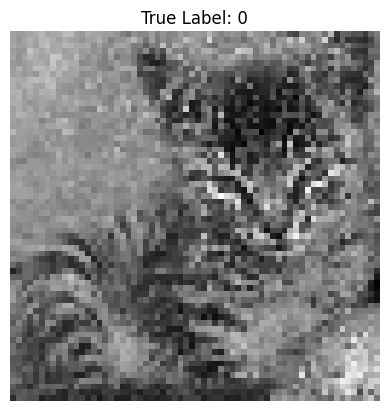

The predication is : True
The Predication is  0


In [35]:
"""
plot image and predicate it .. 

"""


import matplotlib.pyplot as plt

# Select a specific test sample
sample_index = 190  # Replace with the index of the desired image in the test set
sample_image = x_test[sample_index]
sample_label = y_test[sample_index]

# Reshape the image if needed
image = sample_image.reshape(64, 64)

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f"True Label: {sample_label}")
plt.axis('off')

# Display the plot
plt.show()
image = cv2.resize(image , (64 ,64))
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = np.array(image)
y_pred = svm.predict(x_test)

if y_pred[sample_index] == sample_label : 
    print("The predication is : True")
else : 
    print("The Predication is : False")
print("The Predication is " , y_pred[sample_index])    

In [33]:
"""
evaluate my model ... 
"""
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert labels to one-hot encoding if needed
y_test_encoded = pd.get_dummies(y_test)  # Use appropriate encoding method

# Make predictions on the test set
y_pred = svm.predict(x_test)

# Calculate multiclass classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
Report = pd.DataFrame({"Metric": ["Accuracy", "Precision", "Recall" , "F1-score"],"Value": [accuracy, precision, recall ,f1 ]})
print(Report)


      Metric     Value
0   Accuracy  0.916000
1  Precision  0.916667
2     Recall  0.916000
3   F1-score  0.915966
